In [127]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [129]:
data_row = pd.read_excel("data_v1.xlsx")

In [130]:
data_row.head(5)

,order_id,customer_id,order_status,Payment_type,Customer_state,Value_purchase,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_delivery,Puntual,review_id,review_score,low_score,review_comment_title,review_comment_message,review_creation_date
0,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,credit_card,SP,157.60,2018-03-19,2018-03-20,2018-03-28,2018-03-29,2018-03-29,0,Puntual,67b1ab8f3ec19d5a90f153f21757d3a1,1,1,NaN,Na descriÃ§Ã£o do produto quando fui efetuar a...,NaT
1,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,credit_card,SP,152.77,2018-05-11,2018-05-11,2018-05-16,2018-05-18,2018-05-22,-4,Anticipado,00800678dcf28b0ea0caef2147b6945d,1,1,produto nÃ£o entregue,Mudo minha opiniÃ£o assim que receber o produto.,NaT
2,001427c0ec99cf8af737bd88e92fd444,eab9c552374be06ed15923016dc9e588,delivered,credit_card,MG,83.25,2018-04-07,2018-04-07,2018-04-09,2018-04-25,2018-05-10,-15,Anticipado,174a50ecc3181301a3585ff14ab5f98b,2,1,NaN,NaN,2018-04-26
3,00169e31ef4b29deaae414f9a5e95929,efb3830adb68fb8a89c948774388ec28,delivered,boleto,RJ,55.11,2018-01-16,2018-01-17,2018-01-17,2018-01-23,2018-02-07,-15,Anticipado,28e20f3ef22e8795ea14e65f54e087a3,1,1,NaN,Entrega muito demorada. Ainda nÃ£o recebi o pr...,2018-01-24
4,001e7cf2ad6bef3ade12ebc56ceaf0f3,d1684ed69f8fd574b7c344de923f379a,delivered,credit_card,MG,51.10,2018-05-19,2018-05-19,2018-05-21,2018-06-04,2018-06-05,-1,Anticipado,048baba3f11436d12b06dab572aafc21,1,1,Pessima,O produto chegou e estragou sozinho,2018-06-05


In [132]:
seller = pd.read_csv("sellers.csv")
seller_subset = seller[["seller_id", "seller_state"]]
order_items = pd.read_csv("order_items.csv")
order_items_subset = order_items[["order_id", "seller_id"]]
sellet_data = pd.merge(order_items_subset, seller_subset, on='seller_id', how='left')

In [134]:
sellet_data.head(3)

,order_id,seller_id,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,SP
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,SP
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,MG


In [136]:
data_row = pd.merge(data_row, sellet_data, on="order_id", how="left")

In [137]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59932 entries, 0 to 59931
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       59932 non-null  object        
 1   customer_id                    59932 non-null  object        
 2   order_status                   59932 non-null  object        
 3   Payment_type                   59932 non-null  object        
 4   Customer_state                 59932 non-null  object        
 5   Value_purchase                 59932 non-null  float64       
 6   order_purchase_timestamp       59932 non-null  datetime64[ns]
 7   order_approved_at              59902 non-null  datetime64[ns]
 8   order_delivered_carrier_date   59826 non-null  datetime64[ns]
 9   order_delivered_customer_date  59651 non-null  datetime64[ns]
 10  order_estimated_delivery_date  59932 non-null  datetime64[ns]
 11  day_of_delivery

In [138]:
data = data_row

In [139]:
data.head()

,order_id,customer_id,order_status,Payment_type,Customer_state,Value_purchase,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_delivery,Puntual,review_id,review_score,low_score,review_comment_title,review_comment_message,review_creation_date,seller_id,seller_state
0,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,credit_card,SP,157.60,2018-03-19,2018-03-20,2018-03-28,2018-03-29,2018-03-29,0,Puntual,67b1ab8f3ec19d5a90f153f21757d3a1,1,1,NaN,Na descriÃ§Ã£o do produto quando fui efetuar a...,NaT,a416b6a846a11724393025641d4edd5e,SP
1,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,credit_card,SP,152.77,2018-05-11,2018-05-11,2018-05-16,2018-05-18,2018-05-22,-4,Anticipado,00800678dcf28b0ea0caef2147b6945d,1,1,produto nÃ£o entregue,Mudo minha opiniÃ£o assim que receber o produto.,NaT,fe2032dab1a61af8794248c8196565c9,SP
2,001427c0ec99cf8af737bd88e92fd444,eab9c552374be06ed15923016dc9e588,delivered,credit_card,MG,83.25,2018-04-07,2018-04-07,2018-04-09,2018-04-25,2018-05-10,-15,Anticipado,174a50ecc3181301a3585ff14ab5f98b,2,1,NaN,NaN,2018-04-26,77530e9772f57a62c906e1c21538ab82,PR
3,00169e31ef4b29deaae414f9a5e95929,efb3830adb68fb8a89c948774388ec28,delivered,boleto,RJ,55.11,2018-01-16,2018-01-17,2018-01-17,2018-01-23,2018-02-07,-15,Anticipado,28e20f3ef22e8795ea14e65f54e087a3,1,1,NaN,Entrega muito demorada. Ainda nÃ£o recebi o pr...,2018-01-24,a3e9a2c700480d9bb01fba070ba80a0e,SP
4,001e7cf2ad6bef3ade12ebc56ceaf0f3,d1684ed69f8fd574b7c344de923f379a,delivered,credit_card,MG,51.10,2018-05-19,2018-05-19,2018-05-21,2018-06-04,2018-06-05,-1,Anticipado,048baba3f11436d12b06dab572aafc21,1,1,Pessima,O produto chegou e estragou sozinho,2018-06-05,2a84855fd20af891be03bc5924d2b453,MG


In [140]:
data = data.drop('order_id', axis=1)
data = data.drop('customer_id', axis=1)
data = data.drop('seller_id', axis=1)
data = data.drop('review_id', axis=1)
data = data.drop('review_creation_date', axis=1)
data = data.drop('order_purchase_timestamp', axis=1)
data = data.drop('order_approved_at', axis=1)
data = data.drop('order_delivered_carrier_date', axis=1)
data = data.drop('order_delivered_customer_date', axis=1)
data = data.drop('order_estimated_delivery_date', axis=1)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59932 entries, 0 to 59931
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_status            59932 non-null  object 
 1   Payment_type            59932 non-null  object 
 2   Customer_state          59932 non-null  object 
 3   Value_purchase          59932 non-null  float64
 4   day_of_delivery         59932 non-null  int64  
 5   Puntual                 59932 non-null  object 
 6   review_score            59932 non-null  int64  
 7   low_score               59932 non-null  int64  
 8   review_comment_title    13150 non-null  object 
 9   review_comment_message  25174 non-null  object 
 10  seller_state            59880 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 5.0+ MB


In [142]:
data['igual_estado'] = (data['seller_state'] == data['Customer_state']).astype(int)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59932 entries, 0 to 59931
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_status            59932 non-null  object 
 1   Payment_type            59932 non-null  object 
 2   Customer_state          59932 non-null  object 
 3   Value_purchase          59932 non-null  float64
 4   day_of_delivery         59932 non-null  int64  
 5   Puntual                 59932 non-null  object 
 6   review_score            59932 non-null  int64  
 7   low_score               59932 non-null  int64  
 8   review_comment_title    13150 non-null  object 
 9   review_comment_message  25174 non-null  object 
 10  seller_state            59880 non-null  object 
 11  igual_estado            59932 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 5.3+ MB


In [145]:
data.describe()

,Value_purchase,day_of_delivery,review_score,low_score,igual_estado
count,59932.000000,59932.000000,59932.000000,59932.000000,59932.000000
mean,177.226066,-214.252269,4.045802,0.158229,0.383935
std,245.006720,2953.115773,1.380524,0.364959,0.486346
min,0.000000,-43416.000000,1.000000,0.000000,0.000000
25%,64.230000,-17.000000,4.000000,0.000000,0.000000
50%,113.965000,-12.000000,5.000000,0.000000,0.000000
75%,194.370000,-7.000000,5.000000,0.000000,1.000000
max,7274.880000,188.000000,5.000000,1.000000,1.000000


In [107]:
data.head(5)

,order_status,Payment_type,Customer_state,Value_purchase,day_of_delivery,Puntual,review_score,low_score,review_comment_title,review_comment_message
0,delivered,credit_card,SP,157.60,0,Puntual,1,1,NaN,Na descriÃ§Ã£o do produto quando fui efetuar a...
1,delivered,credit_card,SP,152.77,-4,Anticipado,1,1,produto nÃ£o entregue,Mudo minha opiniÃ£o assim que receber o produto.
2,delivered,credit_card,MG,83.25,-15,Anticipado,2,1,NaN,NaN
3,delivered,boleto,RJ,55.11,-15,Anticipado,1,1,NaN,Entrega muito demorada. Ainda nÃ£o recebi o pr...
4,delivered,credit_card,MG,51.10,-1,Anticipado,1,1,Pessima,O produto chegou e estragou sozinho


In [146]:
unique_order_status = data['order_status'].unique()
unique_order_status

array(['delivered', 'shipped', 'canceled', 'invoiced', 'unavailable',
       'processing'], dtype=object)

In [147]:
unique_puntual = data['Puntual'].unique()
unique_puntual

array(['Puntual', 'Anticipado', 'demorado'], dtype=object)

In [148]:
data['es_puntual'] = data['Puntual'].map({'Anticipado': 1, 'Puntual': 1, 'demorado': 0})

In [149]:
data = data.drop('Puntual', axis=1)

In [151]:
data = data[data['order_status'] == 'delivered']

In [152]:
data = data.drop('order_status', axis=1)

### Analisis exploratorio

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59650 entries, 0 to 59931
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Payment_type            59650 non-null  object 
 1   Customer_state          59650 non-null  object 
 2   Value_purchase          59650 non-null  float64
 3   day_of_delivery         59650 non-null  int64  
 4   review_score            59650 non-null  int64  
 5   low_score               59650 non-null  int64  
 6   review_comment_title    13080 non-null  object 
 7   review_comment_message  25044 non-null  object 
 8   seller_state            59650 non-null  object 
 9   igual_estado            59650 non-null  int32  
 10  es_puntual              59650 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 5.2+ MB


In [156]:
data.describe()

,Value_purchase,day_of_delivery,review_score,low_score,igual_estado,es_puntual
count,59650.000000,59650.000000,59650.000000,59650.000000,59650.000000,59650.000000
mean,177.290569,-11.569338,4.046035,0.158977,0.384141,0.925281
std,245.168083,10.128506,1.382416,0.365658,0.486396,0.262940
min,0.010000,-147.000000,1.000000,0.000000,0.000000,0.000000
25%,64.230000,-17.000000,4.000000,0.000000,0.000000,1.000000
50%,114.060000,-12.000000,5.000000,0.000000,0.000000,1.000000
75%,194.440000,-7.000000,5.000000,0.000000,1.000000,1.000000
max,7274.880000,188.000000,5.000000,1.000000,1.000000,1.000000


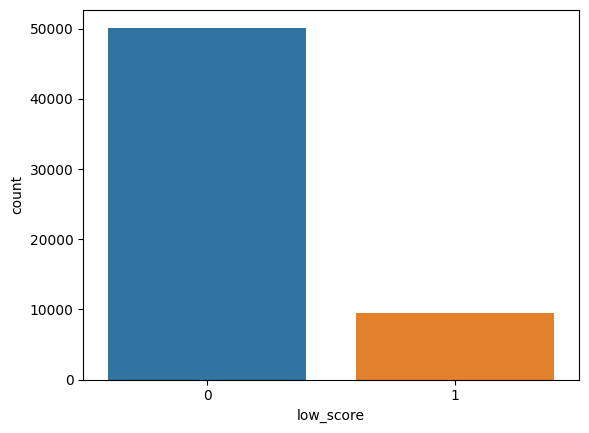

In [157]:
sns.countplot(x='low_score', data=data)
plt.show()

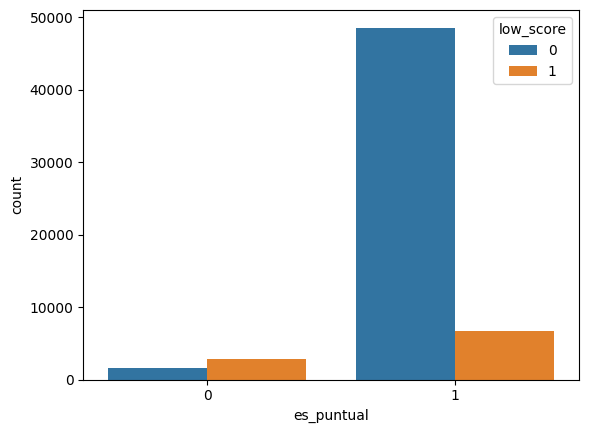

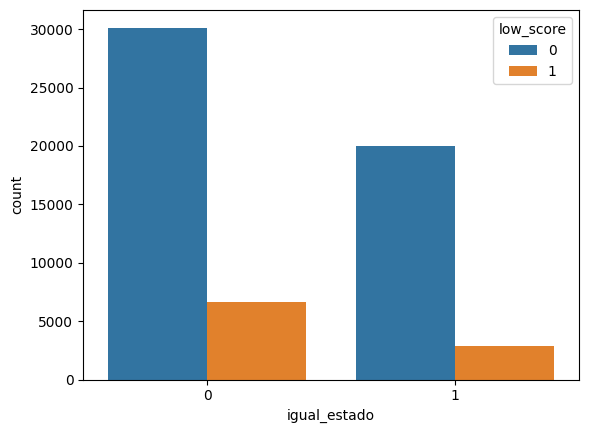

In [162]:
sns.countplot(x='es_puntual', hue='low_score', data=data)
plt.show()

sns.countplot(x='igual_estado', hue='low_score', data=data)
plt.show()

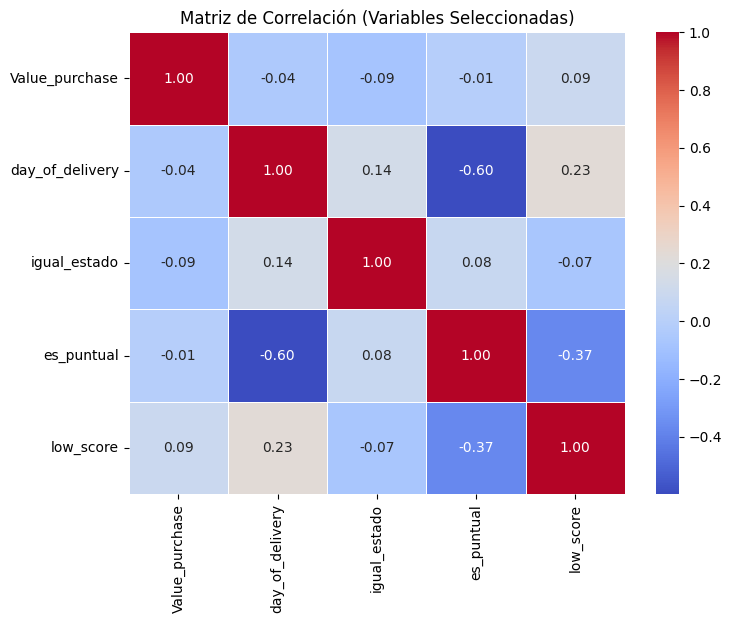

In [163]:
selected_columns = ['Value_purchase', 'day_of_delivery', 'igual_estado', 'es_puntual', 'low_score']
correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Variables Seleccionadas)")
plt.show()


### Modelado

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [168]:
X = data[['Value_purchase', 'day_of_delivery', 'igual_estado', 'es_puntual']]
y = data['low_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8667225481978206
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     10000
           1       0.59      0.56      0.58      1930

    accuracy                           0.87     11930
   macro avg       0.75      0.74      0.75     11930
weighted avg       0.86      0.87      0.87     11930

Confusion Matrix:
 [[9255  745]
 [ 845 1085]]


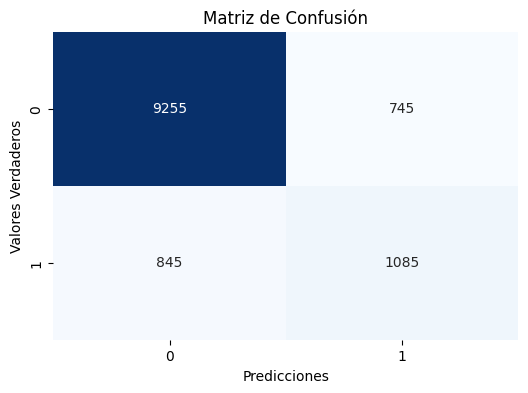

In [169]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()

## Conclusión

Tras la evaluación de nuestro modelo, observamos las siguientes tendencias y patrones que podrían explicar las bajas calificaciones en las órdenes:

- Tiempo de Entrega:

Existe una relación significativa entre el tiempo de entrega y las bajas calificaciones. Órdenes con retrasos en la entrega tienden a recibir calificaciones más bajas. Recomendamos optimizar las operaciones logísticas para mejorar la puntualidad y reducir los retrasos.

- Valor de la Compra:

La relación entre el valor de la compra y las calificaciones sugiere que los clientes que realizan compras de mayor valor son más críticos en sus evaluaciones. Es fundamental brindar un servicio excepcional, especialmente en pedidos de alto valor.

- Coincidencia de Estados:

La coincidencia o discrepancia entre los estados del vendedor y del cliente también impacta en las calificaciones. Órdenes con diferencias en los estados pueden generar confusiones y afectar la satisfacción del cliente.

- Puntualidad:

La columna "es_puntual" indica que las órdenes anticipadas o puntuales reciben, en general, mejores calificaciones. Reforzamos la importancia de mantener un alto nivel de puntualidad en todas las entregas.